<h1 align="center">Mathematical Methods in Engineering - Course Code: 25872</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Questions 1 & 2: [Zahra maleki](https://t.me/Rosebaekfany), Questions 3: [Radin Khayyam](https://t.me/Radinkhayyam)

</h4>

<p>
    Write your code in the <span style="color: green;">Code Cell</span> and run the <span style="color: green;">Evaluation Cell</span> to check the output.<br>
    <span style="color: red; font-weight: bold;">Please refrain from editing the existing codes.</span>
</p>


In [12]:
Name = "Seyed Amirmahdi Sadrzadeh"
Student_Number = "401102015"

### Importing necessary libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from PIL import Image
import time
from numpy import asarray
from sklearn.utils.extmath import randomized_svd
import requests

In [14]:
np.random.RandomState(0)

RandomState(MT19937) at 0x7BCD6DE58540

## Problem 1: SVD for Compression ``(35 pt.)``

In this question, we want to compress BMP images using SVD. BMP images are not compressed by default and the pixel information is stored in rather a simple format. Colored BMP files are composed of three matrices of size $n × m$ where $n$ and $m$ are the height and width of the image, respectively. Each matrix corresponds to one of the three colors Red, Green, and Blue. Each entry of these matrices is a number between 0 and 255 that specifies the intensity of the corresponding color. The final array is hence a 3D array of size $n × m × 3$.

### 1.1 Image display
Choose two arbitrary BMP files (it is recommended to use different subjects and sizes) and load it into a `numpy` array using the `imread` function. Then, show each image and display their shape.

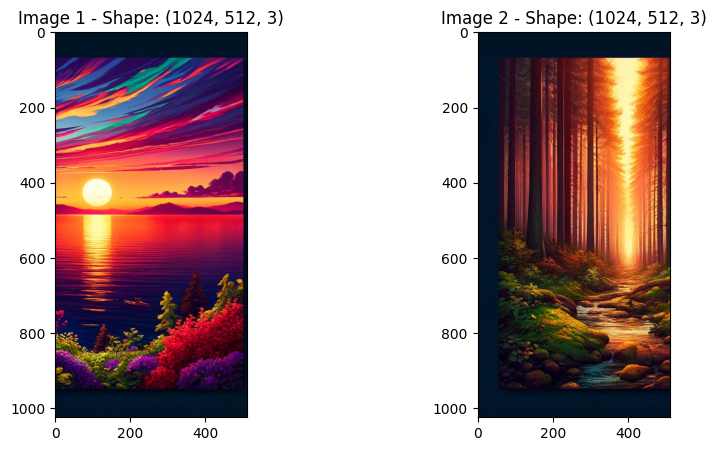

Shape of Image 1: (1024, 512, 3)
Shape of Image 2: (1024, 512, 3)


In [15]:
import numpy as np
from skimage.io import imread, imsave
import matplotlib.pyplot as plt

# Load the composite image
image1 = imread('image1.bmp')
image2 = imread('image2.bmp')

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title(f'Image 1 - Shape: {image1.shape}')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title(f'Image 2 - Shape: {image2.shape}')

plt.show()

# Print shapes of the images
print(f'Shape of Image 1: {image1.shape}')
print(f'Shape of Image 2: {image2.shape}')


### 1.2 Singular Value Decomposition and channel seperation

Calculate the SVD decomposition of each of ech RGB channel.

$$
A = U \Sigma V^T
$$
where $A$ is the original array, $U$ is an $n × n$ unitary matrix, $\Sigma$ is an $n × m$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $V$ is an $m × m$ unitary matrix.

Image 1 - Red channel SVD:
U shape: (1024, 512), S shape: (512,), Vt shape: (512, 512)

Image 2 - Red channel SVD:
U shape: (1024, 512), S shape: (512,), Vt shape: (512, 512)

Image 1 - Green channel SVD:
U shape: (1024, 512), S shape: (512,), Vt shape: (512, 512)

Image 2 - Green channel SVD:
U shape: (1024, 512), S shape: (512,), Vt shape: (512, 512)

Image 1 - Blue channel SVD:
U shape: (1024, 512), S shape: (512,), Vt shape: (512, 512)

Image 2 - Blue channel SVD:
U shape: (1024, 512), S shape: (512,), Vt shape: (512, 512)



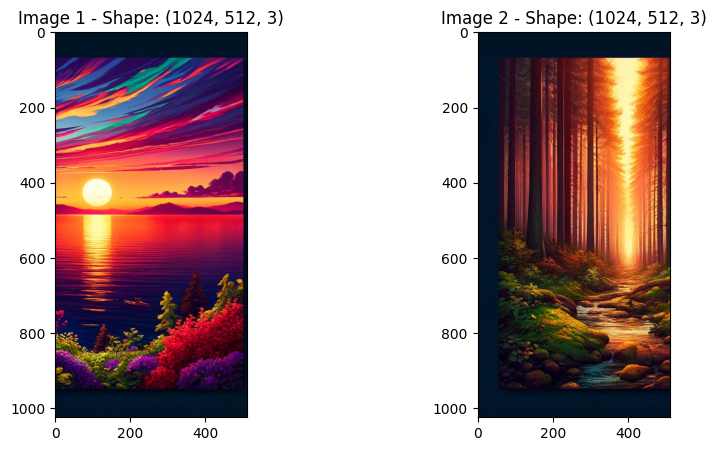

Shape of Image 1: (1024, 512, 3)
Shape of Image 2: (1024, 512, 3)


In [16]:
# Code cell
from scipy.linalg import svd
# Function to perform SVD on each channel of an image
def svd_decomposition(image):
    U_channels = []
    S_channels = []
    Vt_channels = []
    for i in range(3):  # Iterate over each RGB channel
        U, S, Vt = svd(image[:, :, i], full_matrices=False)
        U_channels.append(U)
        S_channels.append(S)
        Vt_channels.append(Vt)
    return U_channels, S_channels, Vt_channels

# Calculate SVD for each channel of the two images
U1, S1, Vt1 = svd_decomposition(image1)
U2, S2, Vt2 = svd_decomposition(image2)

# Display the results
for i, color in enumerate(['Red', 'Green', 'Blue']):
    print(f"Image 1 - {color} channel SVD:")
    print(f"U shape: {U1[i].shape}, S shape: {S1[i].shape}, Vt shape: {Vt1[i].shape}")
    print()
    print(f"Image 2 - {color} channel SVD:")
    print(f"U shape: {U2[i].shape}, S shape: {S2[i].shape}, Vt shape: {Vt2[i].shape}")
    print()

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title(f'Image 1 - Shape: {image1.shape}')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title(f'Image 2 - Shape: {image2.shape}')

plt.show()

# Print shapes of the images
print(f'Shape of Image 1: {image1.shape}')
print(f'Shape of Image 2: {image2.shape}')

### 1.3 compressing the image

Since eigenvalues in the decomposition are sorted in descending order, we can approximate the original array by keeping only the first $k$ columns of $U$, first $k$ rows and columns of $\Sigma$, and first $k$ rows of $V^T$.
Select $k$ to be (5, 10, 20, 30, 50, 100, 200, 250) and approximate the original array using the truncated SVD. Show the approximated image titled with the value of $k$.

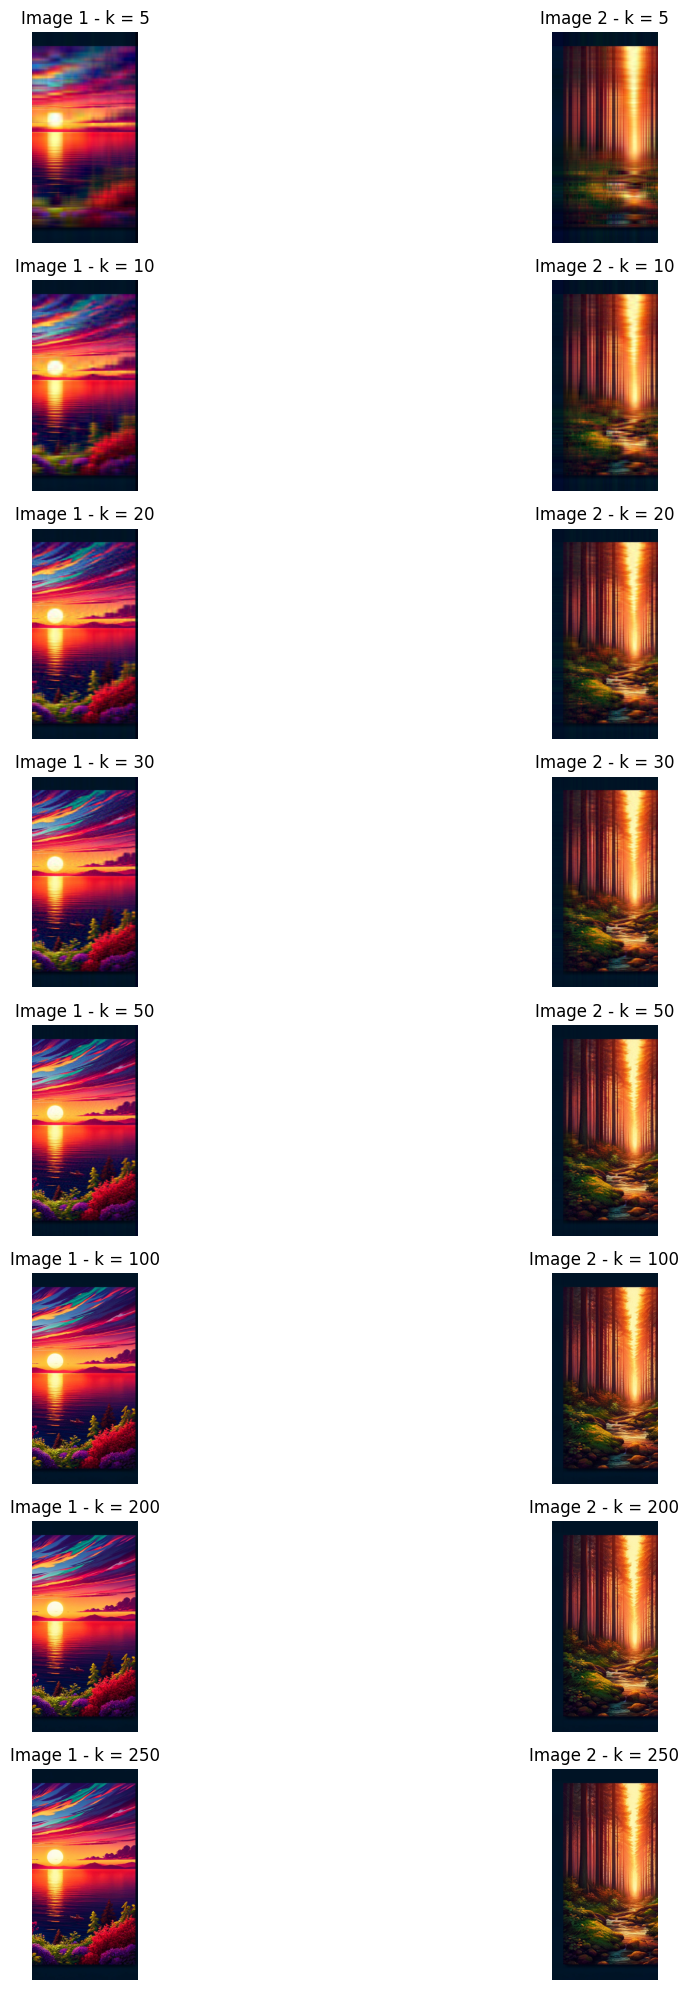

In [17]:
# Code cell

# Function to perform SVD on each channel of an image
def svd_decomposition(image):
    U_channels = []
    S_channels = []
    Vt_channels = []
    for i in range(3):  # Iterate over each RGB channel
        U, S, Vt = svd(image[:, :, i], full_matrices=False)
        U_channels.append(U)
        S_channels.append(S)
        Vt_channels.append(Vt)
    return U_channels, S_channels, Vt_channels

# Function to reconstruct the image using truncated SVD
def reconstruct_image(U, S, Vt, k):
    reconstructed_channels = []
    for i in range(3):  # Iterate over each RGB channel
        U_k = U[i][:, :k]
        S_k = np.diag(S[i][:k])
        Vt_k = Vt[i][:k, :]
        reconstructed_channel = np.dot(U_k, np.dot(S_k, Vt_k))
        reconstructed_channels.append(reconstructed_channel)
    reconstructed_image = np.stack(reconstructed_channels, axis=2)
    return reconstructed_image

# Calculate SVD for each channel of the two images
U1, S1, Vt1 = svd_decomposition(image1)
U2, S2, Vt2 = svd_decomposition(image2)

# Values of k to be used for truncation
k_values = [5, 10, 20, 30, 50, 100, 200, 250]

# Display the approximated images
plt.figure(figsize=(15, 20))

image_counter = 1

for k in k_values:
    # Reconstruct images using truncated SVD
    reconstructed_image1 = reconstruct_image(U1, S1, Vt1, k)
    reconstructed_image2 = reconstruct_image(U2, S2, Vt2, k)

    # Clip values to be in the valid range [0, 255]
    reconstructed_image1 = np.clip(reconstructed_image1, 0, 255).astype(np.uint8)
    reconstructed_image2 = np.clip(reconstructed_image2, 0, 255).astype(np.uint8)

    # Display the approximated images
    plt.subplot(len(k_values), 2, image_counter)
    plt.imshow(reconstructed_image1)
    plt.title(f'Image 1 - k = {k}')
    plt.axis('off')

    plt.subplot(len(k_values), 2, image_counter + 1)
    plt.imshow(reconstructed_image2)
    plt.title(f'Image 2 - k = {k}')
    plt.axis('off')

    image_counter += 2

plt.tight_layout()
plt.show()


#### explion your results.

Explain the relationship between the number of components and the level of compression in the images. How does the image quality change with increasing values of k?

The number of components $k$ in the Singular Value Decomposition (SVD) directly affects the level of compression and the quality of the reconstructed image. Here's an explanation of the relationship between
$k$, compression, and image quality:

Relationship Between $k$ and Compression
Lower $k$:

Higher Compression: When
$k$ is small, fewer singular values and corresponding vectors are used to approximate the original image. This results in a higher compression ratio because only a small portion of the data (the most significant components) is retained.
Smaller Storage: Since fewer components are stored, the amount of data required to represent the image is significantly reduced, leading to lower storage requirements.
Higher $k$:

Lower Compression: As $k$ increases, more singular values and vectors are used. This results in lower compression because more data is retained to approximate the original image.
Larger Storage: With more components stored, the storage requirement increases, as a larger portion of the data is used in the reconstruction.
Relationship Between $k$ and Image Quality
Lower $k$:

Lower Quality: When $k$ is small, only the most significant features of the image are captured, leading to a loss of fine details and higher levels of distortion. The image may appear blurry or pixelated, especially in areas with intricate patterns or sharp edges.
Significant Artifacts: Low $k$ values can introduce noticeable artifacts, as the reconstruction cannot accurately capture all the details of the original image.
Higher $k$:

Higher Quality: As $k$ increases, more details are retained in the reconstructed image, resulting in better quality and closer resemblance to the original image. Fine details, textures, and edges become more accurate.
Reduced Artifacts: With higher $k$ values, the reconstructed image has fewer artifacts and distortions, as more singular values and vectors are included in the approximation.

### 1.4 variance

there is no need to store $U$ and $V$ matrices. Instead, we can store $\Sigma$ and two other matrices of size $n × k$ and $m × k$. Using $\Sigma$ display the plots below. To not compress the image based on a given random number k, we are required to do some math & statistics

1. The plot "Component Importance" shows the  amount  of variance each component carries. The first component preserves the highest variance, then the second, and so on.
2. The plot shows the explained variance as a function of numbers, using this technique you can choose how much the image, relative to its original size gets compressed.

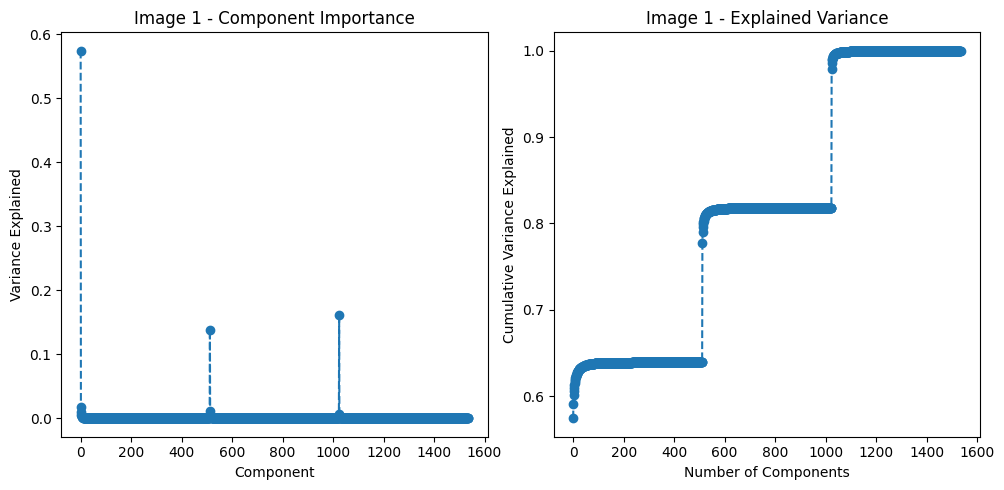

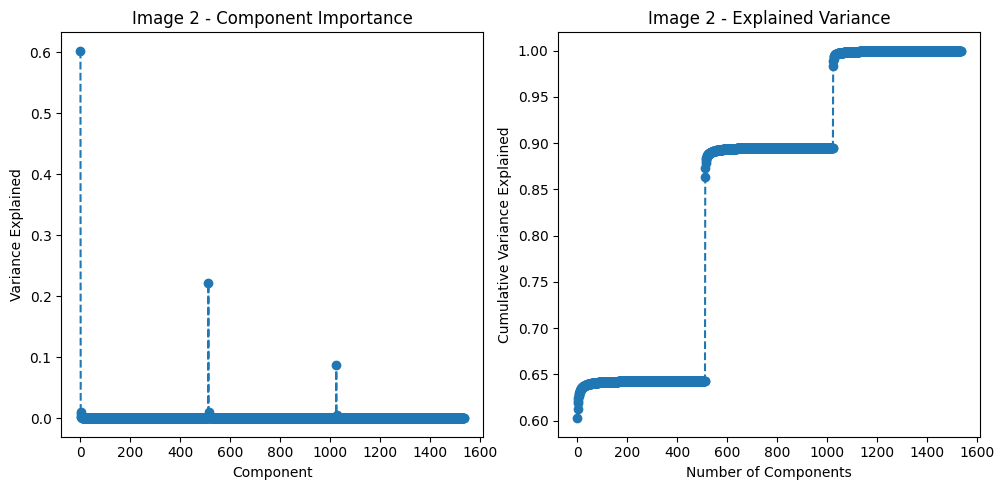

In [18]:
# Code cell

# Function to perform SVD on each channel of an image
def svd_decomposition(image):
    U_channels = []
    S_channels = []
    Vt_channels = []
    for i in range(3):  # Iterate over each RGB channel
        U, S, Vt = svd(image[:, :, i], full_matrices=False)
        U_channels.append(U)
        S_channels.append(S)
        Vt_channels.append(Vt)
    return U_channels, S_channels, Vt_channels

# Calculate SVD for each channel of the two images
_, S1, _ = svd_decomposition(image1)
_, S2, _ = svd_decomposition(image2)

# Function to plot Component Importance and Explained Variance
def plot_svd_statistics(S, title_prefix):
    # Flatten the list of singular values for all channels
    singular_values = np.hstack(S)

    # Calculate the amount of variance each component carries
    variance = singular_values ** 2
    total_variance = np.sum(variance)
    explained_variance_ratio = variance / total_variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    # Plot Component Importance
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(explained_variance_ratio, marker='o', linestyle='--')
    plt.title(f'{title_prefix} - Component Importance')
    plt.xlabel('Component')
    plt.ylabel('Variance Explained')

    # Plot Explained Variance
    plt.subplot(1, 2, 2)
    plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
    plt.title(f'{title_prefix} - Explained Variance')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance Explained')

    plt.tight_layout()
    plt.show()

# Plot statistics for both images
plot_svd_statistics(S1, 'Image 1')
plot_svd_statistics(S2, 'Image 2')


Compress the image with 90% of its explained variance ratio and show the result image.

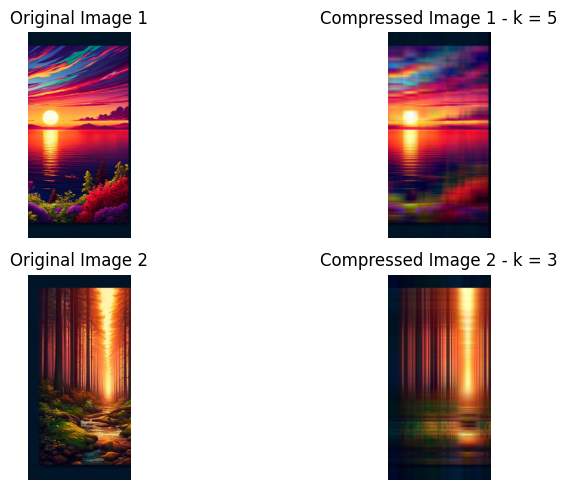

In [19]:
# Code cell

# Function to perform SVD on each channel of an image
def svd_decomposition(image):
    U_channels = []
    S_channels = []
    Vt_channels = []
    for i in range(3):  # Iterate over each RGB channel
        U, S, Vt = svd(image[:, :, i], full_matrices=False)
        U_channels.append(U)
        S_channels.append(S)
        Vt_channels.append(Vt)
    return U_channels, S_channels, Vt_channels

# Function to calculate the number of components needed for the desired explained variance ratio
def find_k_for_variance(S, variance_ratio=0.90):
    variance = S ** 2
    total_variance = np.sum(variance)
    cumulative_variance = np.cumsum(variance)
    explained_variance_ratio = cumulative_variance / total_variance
    k = np.argmax(explained_variance_ratio >= variance_ratio) + 1
    return k

# Function to reconstruct the image using truncated SVD
def reconstruct_image(U, S, Vt, k):
    reconstructed_channels = []
    for i in range(3):  # Iterate over each RGB channel
        U_k = U[i][:, :k]
        S_k = np.diag(S[i][:k])
        Vt_k = Vt[i][:k, :]
        reconstructed_channel = np.dot(U_k, np.dot(S_k, Vt_k))
        reconstructed_channels.append(reconstructed_channel)
    reconstructed_image = np.stack(reconstructed_channels, axis=2)
    return reconstructed_image

# Calculate SVD for each channel of the two images
U1, S1, Vt1 = svd_decomposition(image1)
U2, S2, Vt2 = svd_decomposition(image2)

# Find the number of components needed to retain 90% variance
k1 = [find_k_for_variance(S) for S in S1]
k2 = [find_k_for_variance(S) for S in S2]

# Find the maximum k for each image to ensure all channels have the same k
k1_max = max(k1)
k2_max = max(k2)

# Reconstruct the images using the truncated SVD
reconstructed_image1 = reconstruct_image(U1, S1, Vt1, k1_max)
reconstructed_image2 = reconstruct_image(U2, S2, Vt2, k2_max)

# Clip values to be in the valid range [0, 255]
reconstructed_image1 = np.clip(reconstructed_image1, 0, 255).astype(np.uint8)
reconstructed_image2 = np.clip(reconstructed_image2, 0, 255).astype(np.uint8)

# Display the original and compressed images
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(reconstructed_image1)
plt.title(f'Compressed Image 1 - k = {k1_max}')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image2)
plt.title('Original Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(reconstructed_image2)
plt.title(f'Compressed Image 2 - k = {k2_max}')
plt.axis('off')

plt.tight_layout()
plt.show()


## Problem 2 ``(30 pt.)``

### 2.1 Truncate the SVD
Write the function of truncated_svd

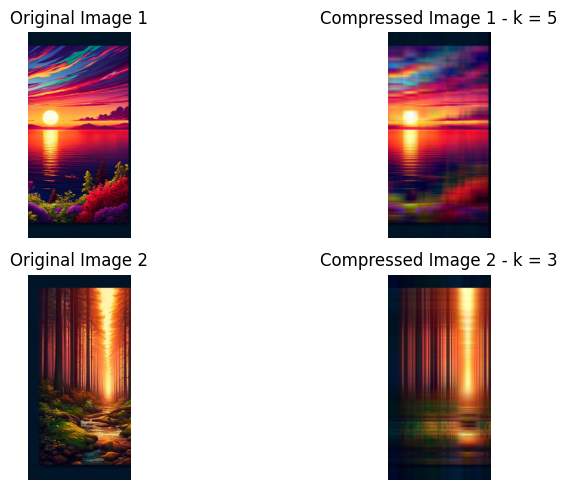

In [20]:
# Code cell

def truncated_svd(image, variance_ratio=0.90):

    # Function to perform SVD on each channel of an image
    def svd_decomposition(image):
        U_channels = []
        S_channels = []
        Vt_channels = []
        for i in range(3):  # Iterate over each RGB channel
            U, S, Vt = svd(image[:, :, i], full_matrices=False)
            U_channels.append(U)
            S_channels.append(S)
            Vt_channels.append(Vt)
        return U_channels, S_channels, Vt_channels

    # Function to calculate the number of components needed for the desired explained variance ratio
    def find_k_for_variance(S, variance_ratio=0.90):
        variance = S ** 2
        total_variance = np.sum(variance)
        cumulative_variance = np.cumsum(variance)
        explained_variance_ratio = cumulative_variance / total_variance
        k = np.argmax(explained_variance_ratio >= variance_ratio) + 1
        return k

    # Function to reconstruct the image using truncated SVD
    def reconstruct_image(U, S, Vt, k):
        reconstructed_channels = []
        for i in range(3):  # Iterate over each RGB channel
            U_k = U[i][:, :k]
            S_k = np.diag(S[i][:k])
            Vt_k = Vt[i][:k, :]
            reconstructed_channel = np.dot(U_k, np.dot(S_k, Vt_k))
            reconstructed_channels.append(reconstructed_channel)
        reconstructed_image = np.stack(reconstructed_channels, axis=2)
        return reconstructed_image

    # Calculate SVD for each channel of the image
    U_channels, S_channels, Vt_channels = svd_decomposition(image)

    # Find the number of components needed to retain the desired variance ratio for each channel
    k_values = [find_k_for_variance(S, variance_ratio) for S in S_channels]

    # Find the maximum k to ensure all channels have the same k
    k_max = max(k_values)

    # Reconstruct the image using the truncated SVD
    reconstructed_image = reconstruct_image(U_channels, S_channels, Vt_channels, k_max)

    # Clip values to be in the valid range [0, 255]
    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)

    return reconstructed_image, k_values


# Compress the images using the truncated SVD function
compressed_image1, k_values1 = truncated_svd(image1, variance_ratio=0.90)
compressed_image2, k_values2 = truncated_svd(image2, variance_ratio=0.90)

# Display the original and compressed images
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.title('Original Image 1')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(compressed_image1)
plt.title(f'Compressed Image 1 - k = {max(k_values1)}')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image2)
plt.title('Original Image 2')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(compressed_image2)
plt.title(f'Compressed Image 2 - k = {max(k_values2)}')
plt.axis('off')

plt.tight_layout()
plt.show()


### 2.2 Randomized SVD

In the following cell, you should implement the randomized SVD for the input matrix. The number of empty lines below suggests the number of lines needed for a possible solution.

In [21]:
def sqr(A):
    Q, R = linalg.qr(A, mode="economic")
    return Q, R

In [22]:
def rsvd(A, n_components, random_state=None, n_oversamples=10, n_iter=5):

    # Set the random state of numpy
    if random_state is not None:
        np.random.seed(random_state)

    ny = A.shape[1]

    # Generate a random matrix P of shape (ny, n_components + n_oversamples)
    P = np.random.randn(ny, n_components + n_oversamples)

    # Sample column space of X with P matrix
    Z = A @ P

    # For n_iter iterations, computes A multiplied by A transpose multiplied by Z
    for _ in range(n_iter):
        Z = A @ (A.T @ Z)

    Q, R = sqr(Z)

    # Step 2: Compute SVD on projected Y = Q.T @ A, name them U1, S, Vt
    Y = Q.T @ A
    U1, S, Vt = linalg.svd(Y, full_matrices=False)

    U = Q @ U1

    return U[:, :n_components], S[:n_components], Vt[:n_components, :]

# Example usage:
matrix = np.random.rand(100, 50)  # Example input matrix
n_components = 10  # Number of components to compute
random_state = 42  # Seed for random number generator

U, S, Vt = rsvd(matrix, n_components, random_state=random_state)

print("U shape:", U.shape)
print("S shape:", S.shape)
print("Vt shape:", Vt.shape)



U shape: (100, 10)
S shape: (10,)
Vt shape: (10, 50)


In the following cell, implement the rsvd as you did before but this time use the LU decomposition instead of the multiplication of matrices.

In [23]:
# Using lu insted of multiplication (can be quite unstable try different random seeds if needed)
def nrsvd(A, n_components, random_state=None, n_oversamples=10, n_iter=5):

    # Set the random state of numpy
    if random_state is not None:
        np.random.seed(random_state)

    ny = A.shape[1]

    # Generate a random matrix P of shape (ny, n_components + n_oversamples)
    P = np.random.randn(ny, n_components + n_oversamples)

    # Sample column space of X with P matrix
    Z = A @ P

    # For n_iter iterations, computes LU decomposition
    for _ in range(n_iter):
        LU, piv = linalg.lu_factor(A @ A.T)
        Z = linalg.lu_solve((LU, piv), Z)

    Q, R = sqr(Z)

    # Step 2: Compute SVD on projected Y = Q.T @ A, name them U1, S, Vt
    Y = Q.T @ A
    U1, S, Vt = linalg.svd(Y, full_matrices=False)

    U = Q @ U1

    return U[:, :n_components], S[:n_components], Vt[:n_components, :]

# Example usage:
matrix = np.random.rand(100, 50)  # Example input matrix
n_components = 10  # Number of components to compute
random_state = 42  # Seed for random number generator

U, S, Vt = nrsvd(matrix, n_components, random_state=random_state)

print("U shape:", U.shape)
print("S shape:", S.shape)
print("Vt shape:", Vt.shape)

U shape: (100, 10)
S shape: (10,)
Vt shape: (10, 50)


This function performs the randomized SVD of sklearn library. Do not change this cell.

In [24]:
def srsvd(A, n_components, random_state, n_oversamples, n_iter):
    U, s, Vh = randomized_svd(A, n_components=n_components, random_state=random_state, n_oversamples=n_oversamples, n_iter=n_iter)
    return U[:, :n_components], s[:n_components], Vh[:n_components, :]

In order to test your randomized SVD code, please run the following cell. It contains test cases to verify the correctness of your implementation.

In [25]:
def make_matrix(m,n,k,randomstate):
    n_rows = m
    n_cols = n
    t = int(n_rows*n_cols*k)
    np.random.RandomState(randomstate)
    rr = np.random.choice(np.arange(0,n_rows),t)
    cr = np.random.choice(np.arange(0,n_cols),t)
    M = np.zeros((n_rows,n_cols))
    M[rr,cr]= 1
    return M

def base_rsvd(rsvdscipy,att):
  err = [0]*len(att)
  tim = [0]*len(att)
  for i in range(len(att)):
    M = make_matrix(att[i][0],att[i][1],0.01,att[i][3])
    start_time = time.time()
    U, s, Vh = rsvdscipy(M,att[i][2],att[i][3],att[i][4],att[i][5])
    time_length = time.time() - start_time
    M_rec = U @ np.diag(s) @ Vh
    error = np.linalg.norm(M - M_rec, ord='fro')/np.linalg.norm(M, ord='fro')
    err[i] = error
    tim[i] = time_length
    print(f"srsvd test {i+1}: error: {error:.3f}, time: {time_length:.3f}")
  print("-------------------------------")
  return err,tim

def test_rsvd(rsvdscipy,svd1):
  att = [(3000,3000,500,0,10,4),(1500,1400,500,0,10,5),(2000,5000,400,0,10,7),(6000,2600,400,0,10,3)]
  err,tim = base_rsvd(rsvdscipy,att)
  for i in range(4):
    M = make_matrix(att[i][0],att[i][1],0.01,att[i][3])
    start_time = time.time()
    U, s, Vh = svd1(M,att[i][2],att[i][3],att[i][4],att[i][5])
    time_length = time.time() - start_time
    M_rec = U @ np.diag(s) @ Vh
    error = np.linalg.norm(M - M_rec, ord='fro')/np.linalg.norm(M, ord='fro')
    if error > err[i]+0.1:
      print(f"Test{i+1}, Alg rsvd: \033[31mFailed!\033[0m because of error \n with Error {error:.3f} and time {time_length:.3f} \n ------------------")
    elif time_length > tim[i]+0.5:
      print(f"Test{i+1}, Alg rsvd: \033[31mFailed!\033[0m because of time \n with Error {error:.3f} and time {time_length:.3f} \n ------------------")
    else:
      print(f"Test{i+1}, Alg rsvd: \033[32mPassed!\033[0m \n with Error {error:.3f} and time {time_length:.3f} \n ------------------")

In [26]:
test_rsvd(srsvd,rsvd)

srsvd test 1: error: 0.729, time: 6.676
srsvd test 2: error: 0.485, time: 2.573
srsvd test 3: error: 0.769, time: 8.789
srsvd test 4: error: 0.823, time: 5.132
-------------------------------
Test1, Alg rsvd: Passed! 
 with Error 0.728 and time 4.873 
 ------------------
Test2, Alg rsvd: Passed! 
 with Error 0.486 and time 2.146 
 ------------------
Test3, Alg rsvd: Passed! 
 with Error 0.769 and time 5.155 
 ------------------
Test4, Alg rsvd: Passed! 
 with Error 0.823 and time 4.752 
 ------------------


Here you can visualize the result of various svd methods on a cat image. You can also compare the time it takes for each method to run.

In [27]:
url = 'https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg?cs=srgb&dl=pexels-pixabay-45201.jpg&fm=jpg'
img = Image.open(requests.get(url, stream=True).raw)

rgb_image = asarray(img)
gray_image = np.average(rgb_image, axis=2, weights=[0.2989, 0.5870, 0.1140])

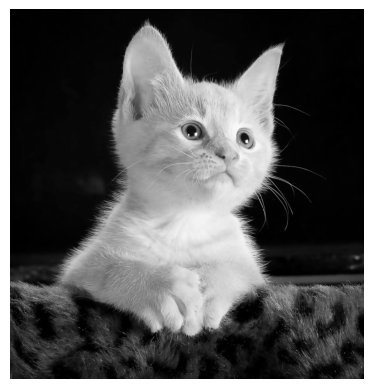

In [28]:
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [29]:
def show_images(im,k):
  start_time = time.time()
  U, s, Vh = linalg.svd(im)
  image1 = U[:, :k] @ np.diag(s[:k]) @ Vh[:k, :]
  t1 = time.time()-start_time
  start_time = time.time()
  U, s, Vh = rsvd(im,k,0,10,4)
  image2 = U @ np.diag(s) @ Vh
  t2 = time.time()-start_time
  start_time = time.time()
  U, s, Vh = nrsvd(im,k,0,10,4)
  image3 = U @ np.diag(s) @ Vh
  t3 = time.time()-start_time
  start_time = time.time()
  U, s, Vh = srsvd(im,k,0,10,4)
  image4 = U @ np.diag(s) @ Vh
  t4 = time.time()-start_time

  fig, axes = plt.subplots(nrows=2, ncols=2)

  axes[0, 0].imshow(image1, cmap='gray')
  axes[0, 0].set_title(f'svd, t = {t1:.2f}s')
  axes[0, 0].axis('off')
  axes[0, 1].imshow(image2, cmap='gray')
  axes[0, 1].set_title(f'rsvd, t = {t2:.2f}s')
  axes[0, 1].axis('off')
  axes[1, 0].imshow(image3, cmap='gray')
  axes[1, 0].set_title(f'nrsvd, t = {t3:.2f}s')
  axes[1, 0].axis('off')
  axes[1, 1].imshow(image4, cmap='gray')
  axes[1, 1].set_title(f'srsvd, t = {t4:.2f}s')
  axes[1, 1].axis('off')

  plt.tight_layout()
  plt.show()


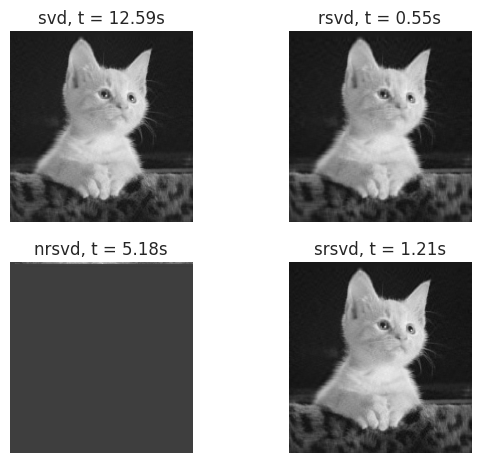

In [ ]:
show_images(gray_image,50)

## Problem 3: PCA and its applications ``(50 pt.)``


Principal Component Analysis (PCA) is a statistical technique commonly used in data analysis and machine learning for dimensionality reduction while preserving as much variance as possible. It helps in identifying patterns in data based on the correlation between features. The goal of PCA is to reduce the number of variables of a data set, while preserving as much information (variance) as possible.

### Step 1: Standardize the Dataset
Normalize each feature in the dataset to have zero mean and unit variance to ensure each feature contributes equally:

\begin{align}
z_i = \frac{(x_i - \mu)}{\sigma}
\end{align}

### Step 2: Compute the Covariance Matrix
Construct a covariance matrix to analyze how features vary from the mean with respect to each other, which helps in identifying correlated features:

\begin{align}
C = \frac{1}{n-1} \times (X^T X)
\end{align}

where \( X \) is the standardized data matrix.

### Step 3: Calculate Eigenvalues and Eigenvectors
Solve for eigenvalues and their corresponding eigenvectors of the covariance matrix; these will determine the new axes (principal components) for the data projection:

\begin{align}
Cv = \lambda v
\end{align}

### Step 4: Sort Eigenvalues and Eigenvectors
Order the eigenvalues from largest to smallest and rank the eigenvectors accordingly. This ranking indicates the relative significance of each principal component.

### Step 5: Project Data onto Principal Components
Transform the original dataset into a new coordinate system by projecting it onto the principal eigenvectors, reducing dimensionality while retaining most of the variance:

\begin{align}
Y = XW
\end{align}

Here, \( W \) is the matrix containing the selected eigenvectors, and \( Y \) is the transformed data matrix. This final transformation results in a new dataset that highlights the most significant relationships within the original data.

---
In the section below, import all the libraries you need:

In [30]:
# Code cell
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization styles
sns.set(style='whitegrid')

# Print statement to indicate successful import
print("Libraries imported successfully!")

Libraries imported successfully!


The MNIST dataset is a large collection of handwritten digits commonly used for training various image processing systems. It contains 70,000 images of handwritten digits from 0 to 9, each represented as a 28x28 pixel grayscale image.

load the dataset and show the first 50 samples:

In [31]:
#load the data set and fill nan value with 0
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

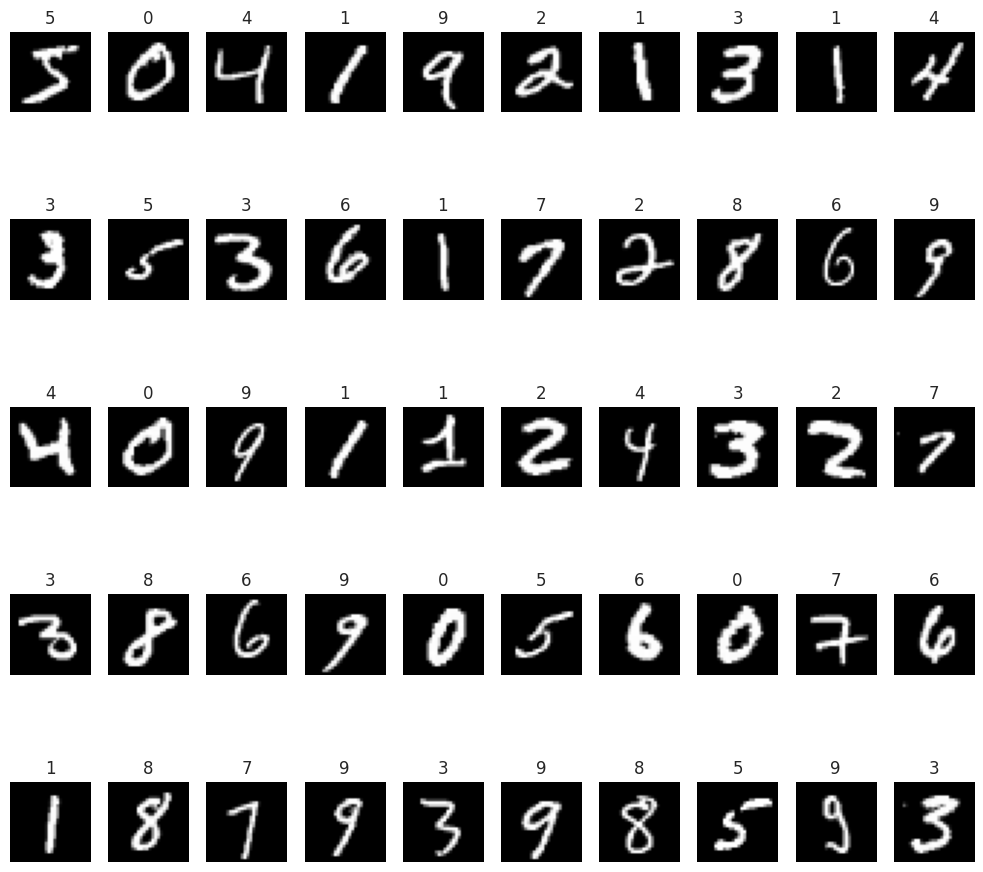

In [32]:
# here show 50 first of this images
# Function to display the first 50 samples
def display_samples(samples, labels, num_samples=50):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(5, 10, i + 1)
        plt.imshow(samples[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display the first 50 samples from the training set
display_samples(x_train, y_train, num_samples=50)

PCA is affected by scale, so you need to do some normalization on data before applying PCA.

1- Reshape the data from a 28x28 matrix to a flattened 784-element vector.

2- Subtract the mean and divide by the standard deviation for each sample.


In [33]:
# Code cell
# 1. Reshape the data from 28x28 to 784-element vectors
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# 2. Subtract the mean and divide by the standard deviation for each sample
# Compute the mean and standard deviation of the training data
mean = np.mean(x_train_flattened, axis=0)
std = np.std(x_train_flattened, axis=0)

# Avoid division by zero by setting zero std values to one
std[std == 0] = 1

# Normalize the training and test data
x_train_normalized = (x_train_flattened - mean) / std
x_test_normalized = (x_test_flattened - mean) / std

In this section, first obtain the covariance matrix of the data and then extract its eigenvalues and eigenvectors. Finally, sort the eigenvalues and their corresponding eigenvectors from largest to smallest.

In [35]:
# Code cell
# Step 1: Compute the Covariance Matrix
cov_matrix = np.cov(x_train_normalized, rowvar=False)

# Step 2: Extract Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 3: Sort Eigenvalues and Eigenvectors from Largest to Smallest
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("Sorted Eigenvalues:\n", sorted_eigenvalues)
print("Sorted Eigenvectors (first 5 vectors):\n", sorted_eigenvectors[:, :5])

Sorted Eigenvalues:
 [ 4.04876351e+01  2.92416975e+01  2.68118045e+01  2.06866182e+01
  1.80766501e+01  1.57331779e+01  1.37906091e+01  1.25175891e+01
  1.10067953e+01  1.00504971e+01  9.62045779e+00  8.63097356e+00
  7.99159687e+00  7.81488215e+00  7.37553786e+00  7.13058751e+00
  6.71398002e+00  6.60400749e+00  6.40604846e+00  6.23737743e+00
  5.93229172e+00  5.76059855e+00  5.48403364e+00  5.31859721e+00
  5.12873534e+00  4.96062446e+00  4.90533662e+00  4.70843497e+00
  4.52919760e+00  4.39470849e+00  4.27522172e+00  4.21399693e+00
  4.09838079e+00  4.03181137e+00  3.97713624e+00  3.86052409e+00
  3.80864021e+00  3.72563426e+00  3.64393543e+00  3.44169730e+00
  3.41624517e+00  3.36378527e+00  3.25773631e+00  3.23620323e+00
  3.20478100e+00  3.17911021e+00  3.14205728e+00  3.08588859e+00
  3.06076556e+00  3.03759974e+00  2.90171955e+00  2.86408562e+00
  2.84980787e+00  2.82374220e+00  2.76632955e+00  2.71778127e+00
  2.69168208e+00  2.65850712e+00  2.61669482e+00  2.57622805e+00
  2.

Now, we want to examine how many components can represent 75 percent of the total variance of the data. Note that the variance of each component corresponds to its eigenvalue.

Number of components to represent 75% of the total variance: 120


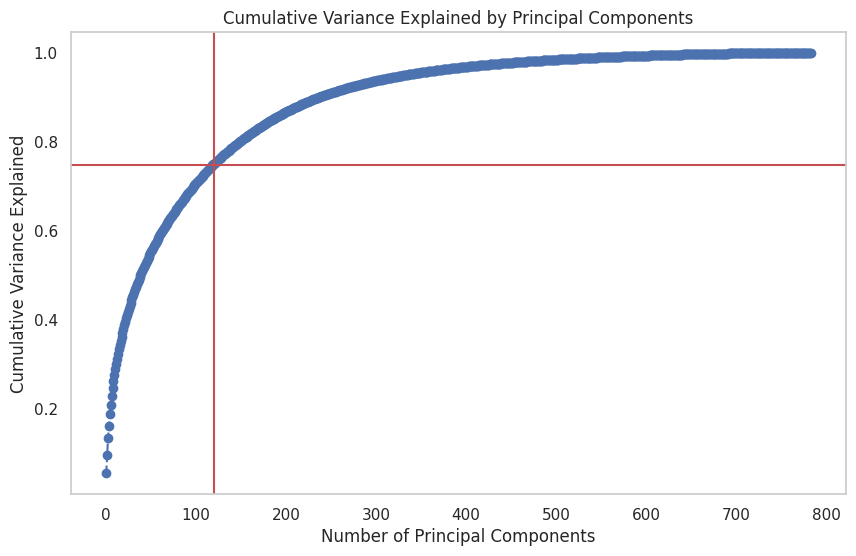

In [36]:
# Code cell
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the dataset and fill NaN values with 0
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)

# 1. Reshape the data from 28x28 to 784-element vectors
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# 2. Subtract the mean and divide by the standard deviation for each sample
mean = np.mean(x_train_flattened, axis=0)
std = np.std(x_train_flattened, axis=0)

# Avoid division by zero by setting zero std values to one
std[std == 0] = 1

# Normalize the training and test data
x_train_normalized = (x_train_flattened - mean) / std
x_test_normalized = (x_test_flattened - mean) / std

# Compute the Covariance Matrix
cov_matrix = np.cov(x_train_normalized, rowvar=False)

# Extract Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort Eigenvalues and Eigenvectors from Largest to Smallest
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the cumulative variance explained by each component
cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Determine the number of components required to explain 75% of the variance
num_components_75_var = np.argmax(cumulative_variance >= 0.75) + 1

print(f"Number of components to represent 75% of the total variance: {num_components_75_var}")

# Plot the cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.axvline(x=num_components_75_var, color='r', linestyle='-')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()


Now in this section, project the available data onto these components, perform dimensionality reduction, and then return the dimensions to the size of the original images. Draw an image of one of the samples for both states: before dimension reduction on the components and after it.

Number of components to represent 75% of the total variance: 120


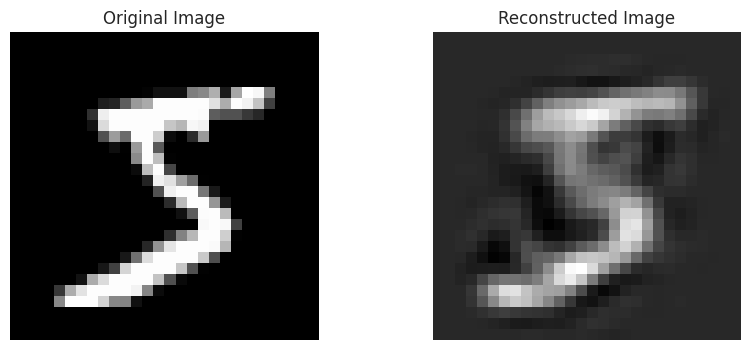

In [37]:
# Code cell
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the dataset and fill NaN values with 0
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)

# 1. Reshape the data from 28x28 to 784-element vectors
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
x_test_flattened = x_test.reshape(x_test.shape[0], -1)

# 2. Subtract the mean and divide by the standard deviation for each sample
mean = np.mean(x_train_flattened, axis=0)
std = np.std(x_train_flattened, axis=0)

# Avoid division by zero by setting zero std values to one
std[std == 0] = 1

# Normalize the training and test data
x_train_normalized = (x_train_flattened - mean) / std
x_test_normalized = (x_test_flattened - mean) / std

# Compute the Covariance Matrix
cov_matrix = np.cov(x_train_normalized, rowvar=False)

# Extract Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort Eigenvalues and Eigenvectors from Largest to Smallest
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Calculate the cumulative variance explained by each component
cumulative_variance = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Determine the number of components required to explain 75% of the variance
num_components_75_var = np.argmax(cumulative_variance >= 0.75) + 1
print(f"Number of components to represent 75% of the total variance: {num_components_75_var}")

# Project the data onto the top principal components
W = sorted_eigenvectors[:, :num_components_75_var]
x_train_reduced = np.dot(x_train_normalized, W)

# Reconstruct the data from the reduced dimensions
x_train_reconstructed = np.dot(x_train_reduced, W.T)

# Denormalize the reconstructed data
x_train_reconstructed = x_train_reconstructed * std + mean

# Function to display an image before and after dimensionality reduction
def display_before_after(original, reconstructed, index):
    plt.figure(figsize=(10, 4))
    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original[index].reshape(28, 28), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    # Display reconstructed image
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed[index].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed Image")
    plt.axis('off')
    plt.show()

# Display an image before and after dimensionality reduction
sample_index = 0  # Index of the sample to display
display_before_after(x_train_flattened, x_train_reconstructed, sample_index)


In this section, define a classifier such as SVM or RandomForest, and use the test and training data to determine the accuracy of the classifier. Repeat this process for different numbers of components and examine the impact of increasing the number of components on accuracy. Note that in this section, you can use built-in functions for performing PCA and classification. Additionally, identify which number of components results in the best accuracy.

In [41]:
import numpy as np
from keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# define a function that calculate PCA
def do_pca(n_components, data):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(data)

In [42]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.
def ML_model(X_train, y_train, X_test, y_test, print_output=True):
    classifier = SVC()  # You can change this to RandomForestClassifier() or any other classifier
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if print_output:
        print(f"Accuracy: {accuracy * 100:.2f}%")
    return accuracy

In [ ]:
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
# Evaluate the classifier with different numbers of components
num_components_list = range(2, 102)
accuracies = []

for n_components in num_components_list:
    # Perform PCA
    x_train_pca = do_pca(n_components, x_train_normalized)
    x_test_pca = do_pca(n_components, x_test_normalized)

    # Train the classifier and get the accuracy
    accuracy = ML_model(x_train_pca, y_train, x_test_pca, y_test, print_output=False)
    accuracies.append(accuracy)

# Find the number of components with the best accuracy
best_num_components = num_components_list[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"Best number of components: {best_num_components}")
print(f"Best accuracy: {best_accuracy * 100:.2f}%")

# Plot the accuracy against the number of components
plt.figure(figsize=(10, 6))
plt.plot(num_components_list, accuracies, marker='o', linestyle='--')
plt.axvline(x=best_num_components, color='r', linestyle='-')
plt.title('Accuracy vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.grid()
plt.show()